In [1]:
# Importing libraries
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from time import time
from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage
from fvcore.nn import FlopCountAnalysis, flop_count_table


from datasets.cityscapes import CityScapes
from utils import fast_hist, per_class_iou
from models.deeplabv2.deeplabv2 import get_deeplab_v2

warnings.filterwarnings("ignore")

### Training - Single Channel

In [2]:
# Set the device
device = torch.device('cuda')
# Load the model
model = get_deeplab_v2(root_dir='models/deeplabv2').to(device)
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=255)
# optimizer = optim.Adam(model.parameters(), lr=0.0001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.007, momentum=0.9, weight_decay=0.0005)

# Set the model to training mode
model.train()

# Train the model using tqdm
for epoch in range(50):
    hist = np.zeros((19, 19))
    for image, label in tqdm(dataloader):
        image = image.to(device)
        label = label.to(device)
        # Forward pass
        output = model(image)[0]
        # Calculate the loss
        loss = criterion(output, label)
        # Zero the gradients
        optimizer.zero_grad()
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()

        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/deeplabv2/deeplabv2.pth')

Deeplab pretraining loading...


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Epoch: 0, Loss: 0.37251073122024536, mIoU: 0.2786676725345322


100%|██████████| 250/250 [02:03<00:00,  2.02it/s]


Epoch: 1, Loss: 0.26462146639823914, mIoU: 0.4398281131317208


100%|██████████| 250/250 [02:04<00:00,  2.00it/s]


Epoch: 2, Loss: 0.255239337682724, mIoU: 0.537531661092972


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 3, Loss: 0.3869906961917877, mIoU: 0.6037522483868476


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Epoch: 4, Loss: 0.2332235872745514, mIoU: 0.6396661053643257


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Epoch: 5, Loss: 0.22958263754844666, mIoU: 0.6647656030251785


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 6, Loss: 0.17843033373355865, mIoU: 0.6822855493896487


100%|██████████| 250/250 [02:07<00:00,  1.97it/s]


Epoch: 7, Loss: 0.15035268664360046, mIoU: 0.6921459592943755


100%|██████████| 250/250 [02:05<00:00,  1.98it/s]


Epoch: 8, Loss: 0.13763020932674408, mIoU: 0.7015186261099664


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 9, Loss: 0.2183745801448822, mIoU: 0.7109940706517288


100%|██████████| 250/250 [02:08<00:00,  1.95it/s]


Epoch: 10, Loss: 0.14993628859519958, mIoU: 0.717747891811029


100%|██████████| 250/250 [02:09<00:00,  1.93it/s]


Epoch: 11, Loss: 0.24937821924686432, mIoU: 0.7240518719497286


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 12, Loss: 0.1350678950548172, mIoU: 0.7290223225994981


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Epoch: 13, Loss: 0.11812932044267654, mIoU: 0.7336684940076018


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Epoch: 14, Loss: 0.18254022300243378, mIoU: 0.7379081809938859


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 15, Loss: 0.14101232588291168, mIoU: 0.7410736311931907


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 16, Loss: 0.1748722493648529, mIoU: 0.7447310828236011


100%|██████████| 250/250 [02:05<00:00,  2.00it/s]


Epoch: 17, Loss: 0.09810911864042282, mIoU: 0.7482276586576685


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


Epoch: 18, Loss: 0.16871462762355804, mIoU: 0.7504280300521596


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 19, Loss: 0.16322492063045502, mIoU: 0.7535431514093176


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 20, Loss: 0.12739849090576172, mIoU: 0.7559354695248753


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Epoch: 21, Loss: 0.11743175238370895, mIoU: 0.7581773435174015


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Epoch: 22, Loss: 0.14146669209003448, mIoU: 0.7600751702978661


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 23, Loss: 0.11790750175714493, mIoU: 0.7613857588256332


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 24, Loss: 0.13470560312271118, mIoU: 0.7630941384322958


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Epoch: 25, Loss: 0.21043646335601807, mIoU: 0.7647341501172392


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Epoch: 26, Loss: 0.11764279007911682, mIoU: 0.7658394012691461


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 27, Loss: 0.06445056945085526, mIoU: 0.768119355971677


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 28, Loss: 0.0809788852930069, mIoU: 0.7689757010429132


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


Epoch: 29, Loss: 0.09020046889781952, mIoU: 0.7703717490303381


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 30, Loss: 0.09886836260557175, mIoU: 0.7719470678277798


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Epoch: 31, Loss: 0.11068559437990189, mIoU: 0.773044176881123


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 32, Loss: 0.1018550917506218, mIoU: 0.7737638355747544


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


Epoch: 33, Loss: 0.06943297386169434, mIoU: 0.7748474965359551


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 34, Loss: 0.11683887243270874, mIoU: 0.7763030759038273


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


Epoch: 35, Loss: 0.10723806172609329, mIoU: 0.7769395818780926


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


Epoch: 36, Loss: 0.06940162181854248, mIoU: 0.7778121650880185


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


Epoch: 37, Loss: 0.12317239493131638, mIoU: 0.7785687775676047


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 38, Loss: 0.11007936298847198, mIoU: 0.7782782519203969


100%|██████████| 250/250 [02:08<00:00,  1.95it/s]


Epoch: 39, Loss: 0.11749252676963806, mIoU: 0.7796233411145942


100%|██████████| 250/250 [02:08<00:00,  1.94it/s]


Epoch: 40, Loss: 0.08216296136379242, mIoU: 0.780886035578566


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 41, Loss: 0.06257409602403641, mIoU: 0.781716769680369


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 42, Loss: 0.10684382170438766, mIoU: 0.7815855000769732


100%|██████████| 250/250 [02:07<00:00,  1.97it/s]


Epoch: 43, Loss: 0.056658241897821426, mIoU: 0.7826305026217115


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Epoch: 44, Loss: 0.09415015578269958, mIoU: 0.7834963545778354


100%|██████████| 250/250 [02:09<00:00,  1.94it/s]


Epoch: 45, Loss: 0.1249910220503807, mIoU: 0.7843155077260071


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 46, Loss: 0.09062919020652771, mIoU: 0.7850977399838449


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 47, Loss: 0.0923844650387764, mIoU: 0.7846849092487014


100%|██████████| 250/250 [02:06<00:00,  1.98it/s]


Epoch: 48, Loss: 0.08648514747619629, mIoU: 0.7849018590528261


100%|██████████| 250/250 [02:08<00:00,  1.95it/s]


Epoch: 49, Loss: 0.11079790443181992, mIoU: 0.7850549621648636


### Validation

In [3]:
# Set the device
device = torch.device('cuda')
# Load the model
model = get_deeplab_v2(root_dir='models/deeplabv2').to(device)
model.load_state_dict(torch.load('models/deeplabv2/deeplabv2.pth'))
# Set the model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

# Validate the model
hist = np.zeros((19, 19))
for i, (image, label) in tqdm(enumerate(dataloader)):
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    miou = np.mean(per_class_iou(hist))
    
# Print the mIoU
print(f'mIoU: {miou}')

Deeplab pretraining loading...


500it [04:04,  2.05it/s]

mIoU: 0.7809842389391353


### Example

Deeplab pretraining loading...


0it [00:00, ?it/s]


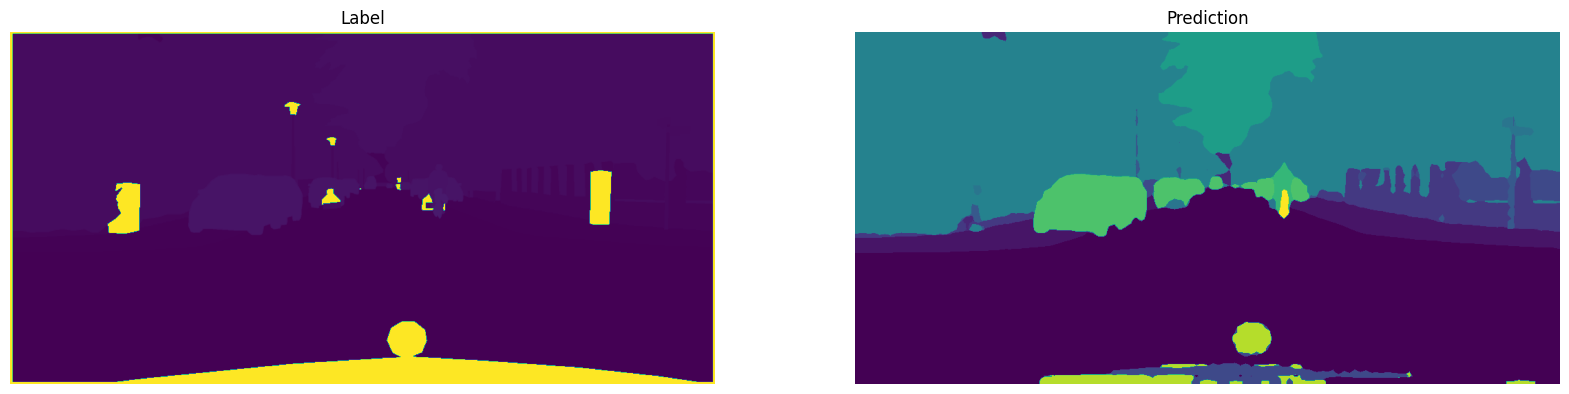

In [20]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the model
model = get_deeplab_v2(root_dir='models/deeplabv2').to(device)
model.load_state_dict(torch.load('models/deeplabv2/deeplabv2.pth'))
# Set the model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

# Validate the model
hist = np.zeros((19, 19))
for i, (image, label) in tqdm(enumerate(dataloader)):
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Break after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### FLOPs and Parameters

In [2]:
# Load the model
model = get_deeplab_v2(root_dir='models/deeplabv2')
model.load_state_dict(torch.load('models/deeplabv2/deeplabv2.pth'))
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
# Get the image and label
image, label = dataset[0]

# Compute the number of flops
flops = FlopCountAnalysis(model, image.unsqueeze(0))
# Get the number of flops
flops = flop_count_table(flops)
# Get the number of parameters
params = sum(p.numel() for p in model.parameters())

# Print the number of parameters and flops
print(f'Number of parameters: {params}\n')
print(flops)

Deeplab pretraining loading...
Number of parameters: 43901068

| module                         | #parameters or shape   | #flops     |
|:-------------------------------|:-----------------------|:-----------|
| model                          | 43.901M                | 0.375T     |
|  conv1                         |  9.408K                |  1.233G    |
|   conv1.weight                 |   (64, 3, 7, 7)        |            |
|  bn1                           |  0.128K                |  16.777M   |
|   bn1.weight                   |   (64,)                |            |
|   bn1.bias                     |   (64,)                |            |
|  layer1                        |  0.216M                |  7.155G    |
|   layer1.0                     |   75.008K              |   2.487G   |
|    layer1.0.conv1              |    4.096K              |    0.136G  |
|    layer1.0.bn1                |    0.128K              |    4.244M  |
|    layer1.0.conv2              |    36.864K             |  

### Latency and FPS

In [6]:
# Load the model
model = get_deeplab_v2(root_dir='models/deeplabv2')
model.load_state_dict(torch.load('models/deeplabv2/deeplabv2.pth'))
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
# Get the image and label
image, label = dataset[0]

# Compute the latency and FPS
iterations = 100
latency = []
fps = []

# Compute the latency and FPS
for _ in range(iterations):
    start = time()
    model(image.unsqueeze(0))
    end = time()
    latency.append(end - start)
    fps.append(1 / (end - start))

# Compute the average latency and FPS
mean_latency = np.mean(latency)
mean_fps = np.mean(fps)
std_latency = np.std(latency)
std_fps = np.std(fps)

# Print the latency and FPS
print(f'Latency: {mean_latency:.3f} +/- {std_latency:.3f}')
print(f'FPS: {mean_fps:.3f} +/- {std_fps:.3f}')


Deeplab pretraining loading...
Latency: 1.260 +/- 0.043
FPS: 0.794 +/- 0.023
